# Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("classi-titanic.csv")
df.head()

Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0

In [2]:
df.describe()

Survived      Pclass         Age
count  714.000000  714.000000  714.000000
mean     0.406162    2.236695   29.699118
std      0.491460    0.838250   14.526497
min      0.000000    1.000000    0.420000
25%      0.000000    1.000000   20.125000
50%      0.000000    2.000000   28.000000
75%      1.000000    3.000000   38.000000
max      1.000000    3.000000   80.000000

In [3]:
df['Sex']=[0 if i=='female' else 1 for i in df['Sex']]
df


Survived  Pclass  Sex   Age
0           0       3    1  22.0
1           1       1    0  38.0
2           1       3    0  26.0
3           1       1    0  35.0
4           0       3    1  35.0
..        ...     ...  ...   ...
709         0       3    0  39.0
710         0       2    1  27.0
711         1       1    0  19.0
712         1       1    1  26.0
713         0       3    1  32.0

[714 rows x 4 columns]

In [4]:
y=df['Survived']
x=df.iloc[:,1:4]
#x=df[['Pclass','Sex','Age']]
x.head()

Pclass  Sex   Age
0       3    1  22.0
1       1    0  38.0
2       3    0  26.0
3       1    0  35.0
4       3    1  35.0

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape)
print(x_test.shape)

(499, 3)
(215, 3)


In [6]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=model.predict(x_train)
print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

0.8336673346693386
[[298   7]
 [ 76 118]]


In [8]:
test_pred=model.predict(x_test)
print(accuracy_score(y_test,test_pred))
print(confusion_matrix(y_test,test_pred))

0.7581395348837209
[[112   7]
 [ 45  51]]


In [9]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from sklearn.externals.six import StringIO

/home/sudhanva/anaconda3/envs/tf114gpu/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


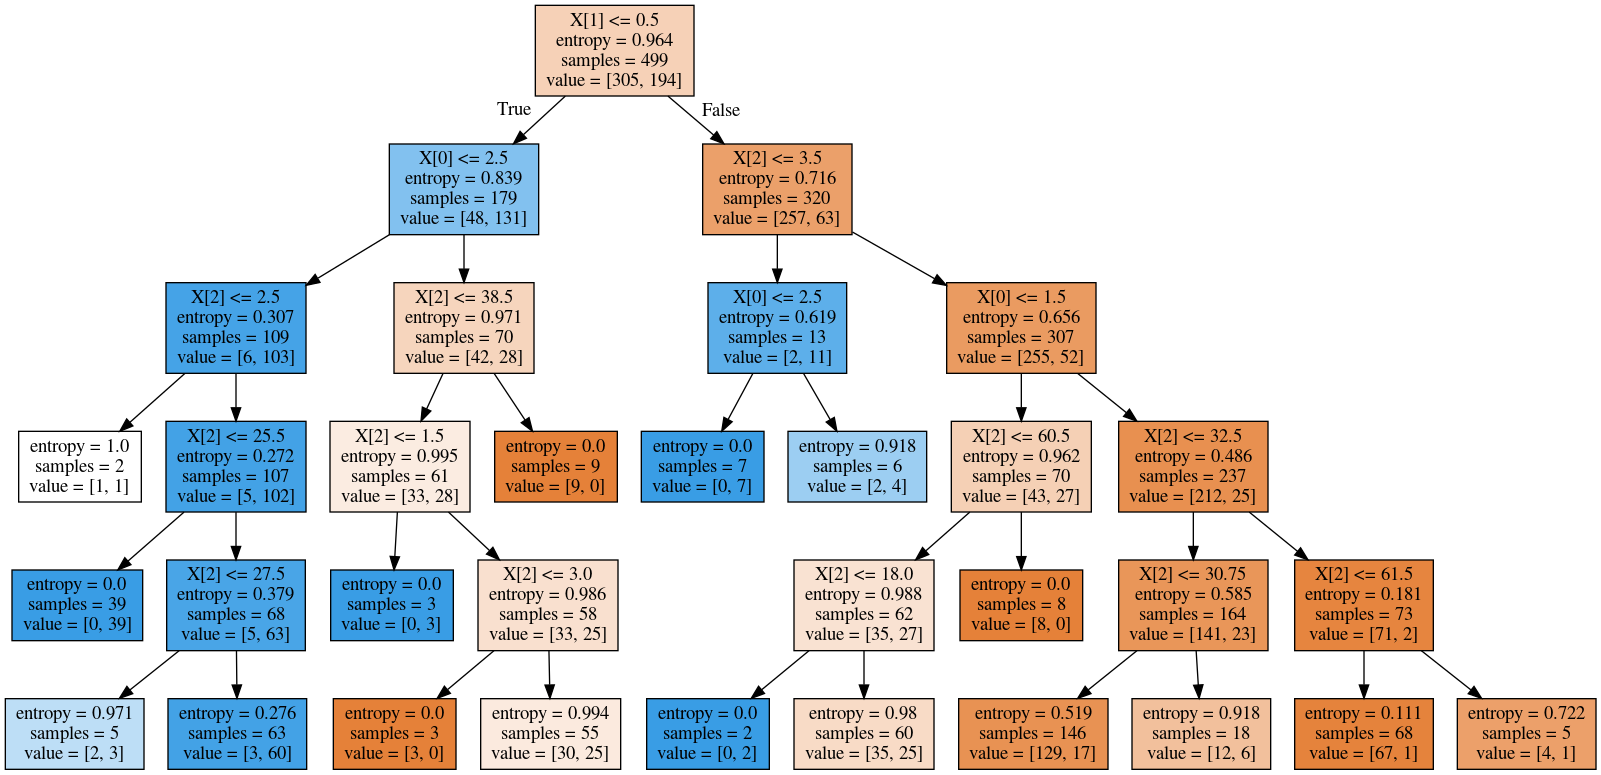

In [10]:
data=StringIO()
export_graphviz(model,out_file=data,filled=True,max_depth=5)
graph=pydot.graph_from_dot_data(data.getvalue())
Image(graph[0].create_png())

In [11]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier

In [12]:
bagm=BaggingClassifier(n_estimators=6)
bagm.fit(x_train,y_train)
pred=bagm.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.786046511627907


In [13]:
rfm=RandomForestClassifier()
rfm.fit(x_train,y_train)
pred=rfm.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.7906976744186046


/home/sudhanva/anaconda3/envs/tf114gpu/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
adam=AdaBoostClassifier(n_estimators=6)
adam.fit(x_train,y_train)
pred=adam.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.7813953488372093
[[94 25]
 [22 74]]


In [15]:
rfm.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
grid_param={'criterion':['gini','entropy'],
           'max_depth':[4,5],
           'min_samples_leaf':[1,2,3],
           'min_samples_split':[4,5],
           'n_estimators':[100,150,200]}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid=GridSearchCV(estimator=rfm,param_grid=grid_param,cv=3,verbose=2)

In [19]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                           

In [20]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   20.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [21]:
y_pred=grid.predict(x_test)

In [22]:
acc=accuracy_score(y_test,y_pred)
acc

0.7674418604651163

In [23]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}